In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the CSV data file to load the video game sales data.

In [57]:
file_path = "video_games_sales.csv"  # Adjust the path to where your CSV is
data = pd.read_csv(file_path)

#### Check for missing values, but it's not affecting too much so I leave it as it is.

In [87]:
data.shape

(16598, 11)

In [85]:
data.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

## Objective 1: Top 10 Best-Selling Video Games (Global Sales and Regional Sales)
This objective aims to identify the top 10 best-selling video games globally and analyze their sales performance across different regions. The analysis includes global sales as well as a breakdown of sales in North America, Europe, Japan, and other regions. Visualizations will be provided to highlight the top games and the distribution of sales across these regions.

### 1.1 Global Sales Breakdown
1. Sort the data by global_sales in descending order to get the highest sales first.
2. Select the top 10 games based on their global sales.
3. Create a bar chart to visualize the top 10 best-selling games with their global sales.

In [186]:
top_10_games = data.sort_values(by='global_sales', ascending=False).head(10)
top_10_games[['name', 'platform', 'year', 'global_sales']]

,name,platform,year,global_sales
0,Wii Sports,Wii,2006.0,82.74
1,Super Mario Bros.,NES,1985.0,40.24
2,Mario Kart Wii,Wii,2008.0,35.82
3,Wii Sports Resort,Wii,2009.0,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,31.37
5,Tetris,GB,1989.0,30.26
6,New Super Mario Bros.,DS,2006.0,30.01
7,Wii Play,Wii,2006.0,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,28.62
9,Duck Hunt,NES,1984.0,28.31


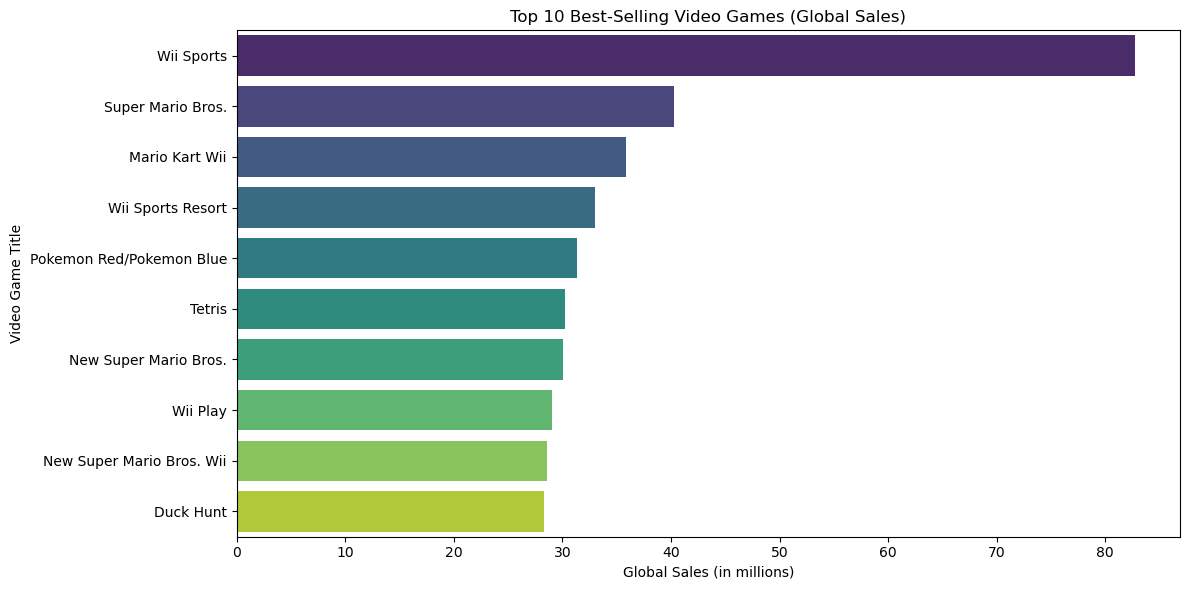

In [188]:
plt.figure(figsize=(12, 6))

sns.barplot(data=top_10_games, x='global_sales', y='name', hue='name', palette='viridis', legend=False)

plt.title('Top 10 Best-Selling Video Games (Global Sales)')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Video Game Title')
plt.tight_layout()
plt.show()

Wii Sports is way ahead of everything else with over 80 million sales — way more than second place Super Mario Bros. at around 40 million. The rest of the top 10 also hover around the 30–40 million mark. From what I know, most of these games are from Nintendo.

### 1.2 Regional Sales Breakdown
1. For each top 10 game, use columns: na_sales, eu_sales, jp_sales, and other_sales.
2. Create a stacked horizontal bar chart showing the sales per region.

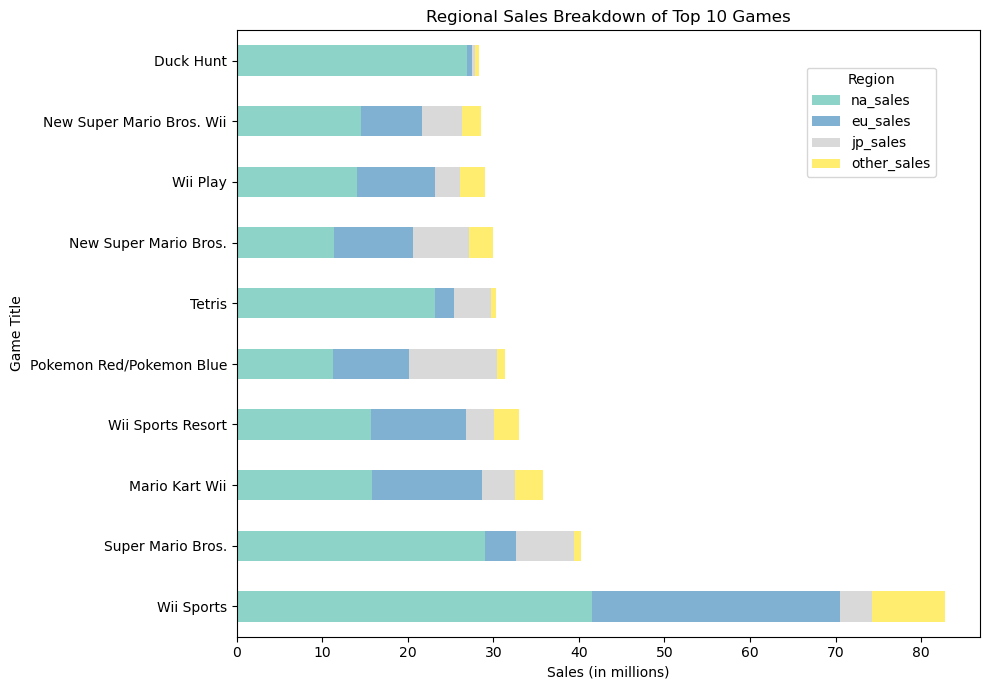

In [171]:
top_10_games.set_index('name')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].plot(
    kind='barh', stacked=True, figsize=(10, 7), colormap='Set3'
)
plt.title('Regional Sales Breakdown of Top 10 Games')
plt.xlabel('Sales (in millions)')
plt.ylabel('Game Title')
plt.legend(title='Region', bbox_to_anchor=(0.95, 0.95))
plt.tight_layout()
plt.show()

For regional sales, most of the revenue still comes from North America, even for games that were made in Japan. This shows how strong the U.S. market is overall.

## Objective 2: Video Game Sales Trends and Releases Over Time
This objective examines how video game sales have evolved over time, focusing on the relationship between release years and sales figures. The analysis will include trends in global sales for games released each year, as well as the number of games released annually. The goal is to explore whether newer games are surpassing older ones in sales and to identify any patterns or shifts in the gaming industry over time.

### 2.1 Global Sales Trend Over Time
1. Select the year and global_sales columns from the dataset.
2. Group the data by year and calculate the sum of global_sales for each year.
3. Plot a line graph to show how total global sales have changed over the years.

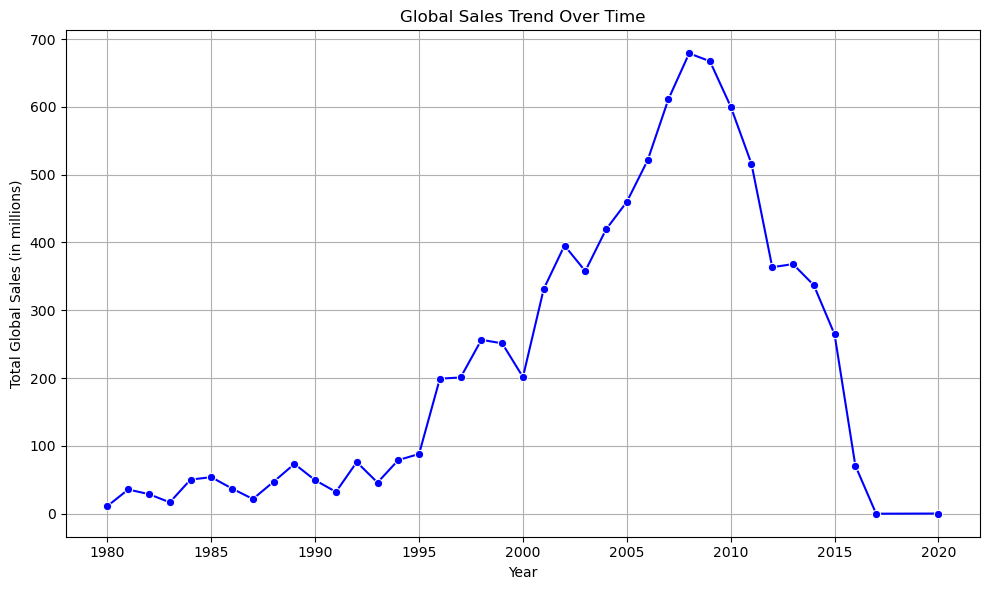

In [200]:
sales_per_year = data.groupby('year')['global_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_per_year, x='year', y='global_sales', marker='o', color='blue')
plt.title('Global Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

2008 is a standout year — both in terms of total game sales and the number of new releases. From 2000 to 2008, there's a clear upward trend in sales, but it starts to drop afterward (probably because recent years are missing from the data).

### 2.2 Number of Games Released Per Year
1. Select the year column from the dataset.
2. Count the Number of Games Released Each Year:
3. Group the data by year and count the number of games released each year.
4. Plot a bar chart to show the count of video games released each year.

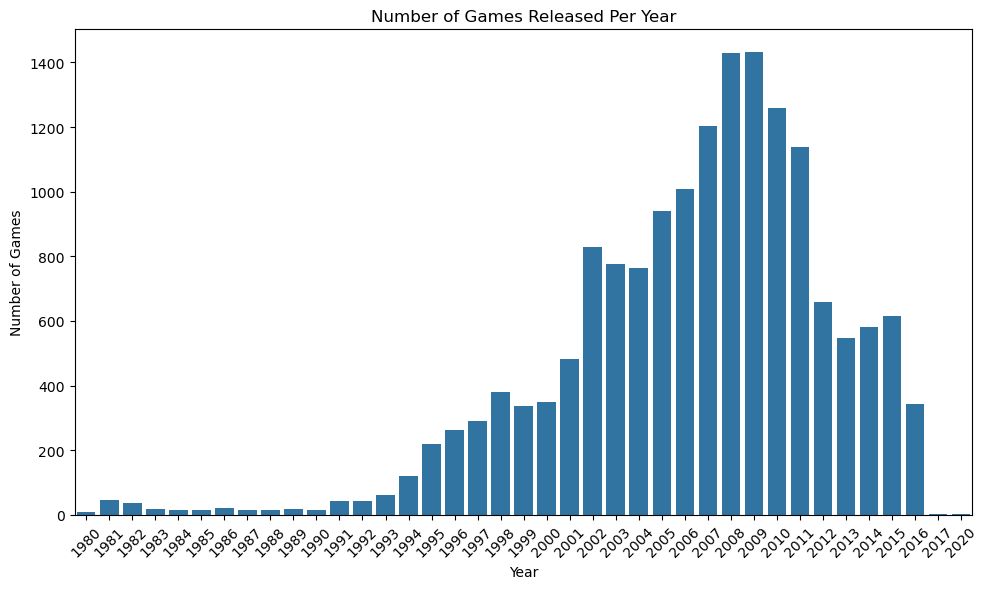

In [208]:
games_per_year['year'] = games_per_year['year'].astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(data=games_per_year, x='year', y='game_count')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After 2011, the number of games released each year suddenly drops and stays low, which might be because game studios started focusing more on making big AAA games that take longer to develop.

## Objective 3: Distribution of Global and Regional Sales by Genre and Platform
This analysis will explore how global and regional video game sales are distributed across different genres and platforms. By analyzing sales data for each genre and platform in different regions (North America, Europe, Japan, and other regions), we can uncover which genres and platforms are most dominant in specific regions. 

### 3.1 Genre Sales Distribution (Global and Regional)
1. Aggregate the global sales by genre.
2. For each region (North America, Europe, Japan, Other), aggregate the regional sales by genre.
3. Plot a pie chart showing the global sales distribution by genre.
4. Plot separate pie charts for each region (NA, EU, JP, Other) showing the distribution of regional sales by genre.

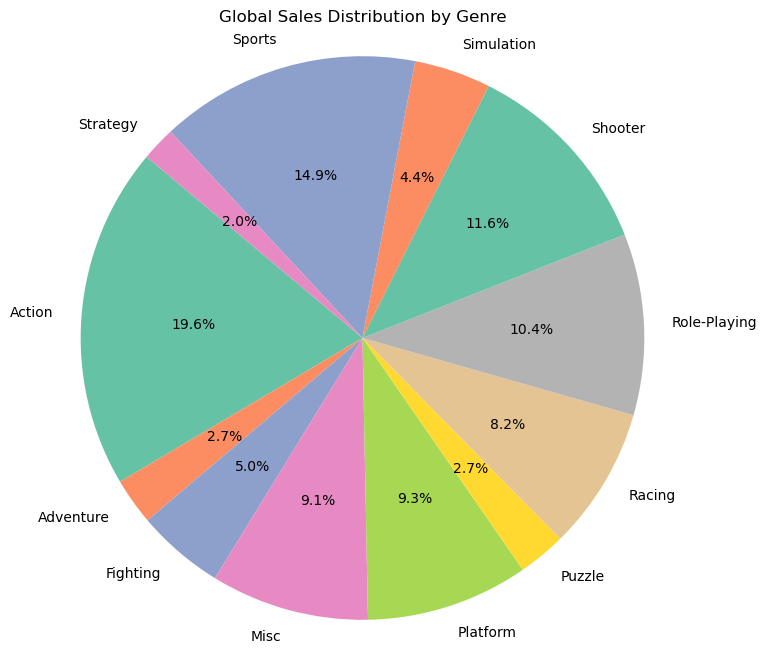

In [214]:
genre_sales = data.groupby('genre')[['global_sales']].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(genre_sales['global_sales'], labels=genre_sales['genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(genre_sales)))
plt.title('Global Sales Distribution by Genre')
plt.axis('equal')
plt.show()

Globally, action games sell the most, but the difference compared to other genres isn’t super big.

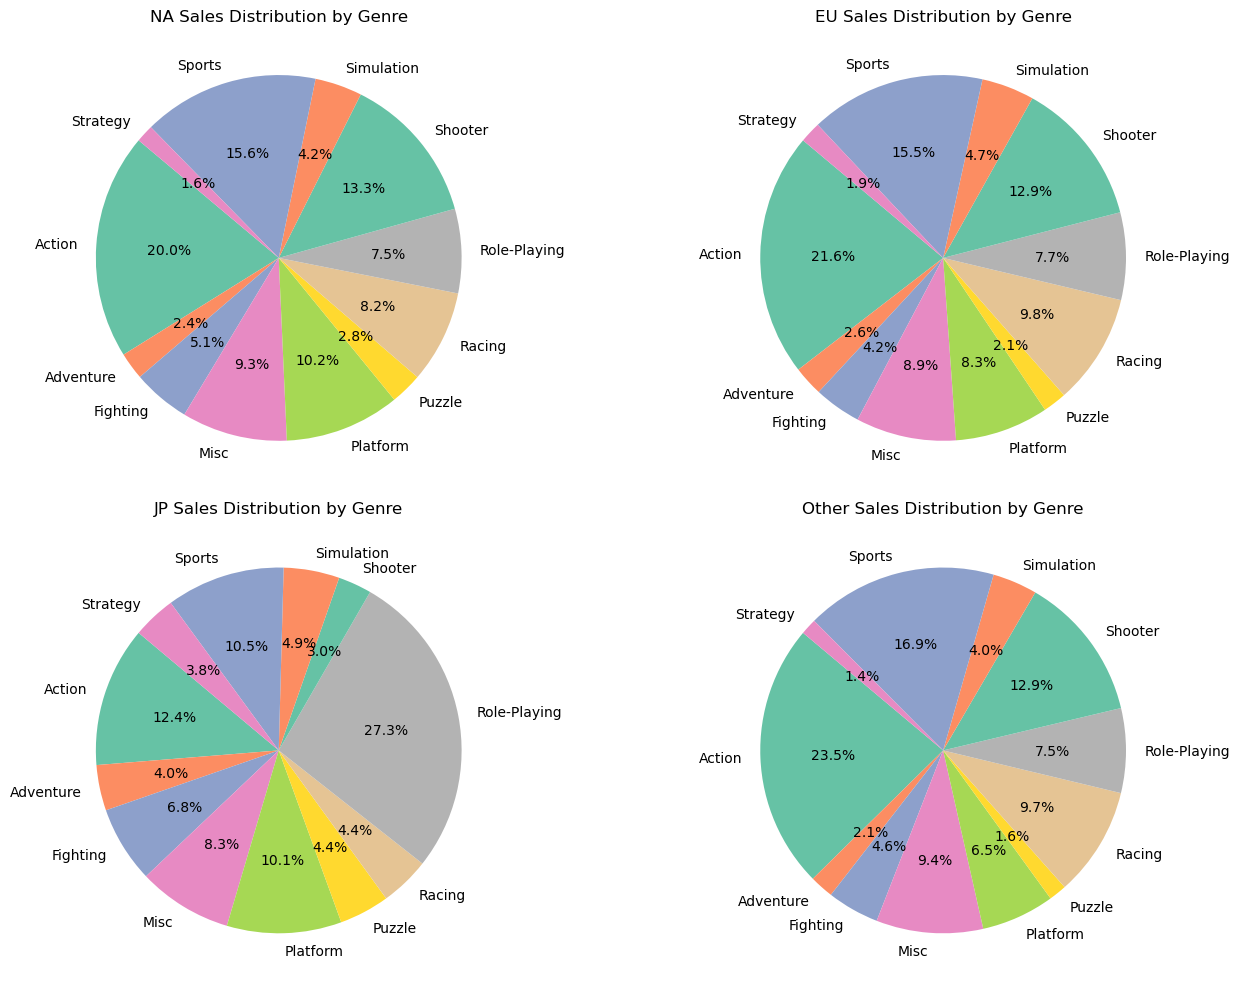

In [216]:
na_genre_sales = data.groupby('genre')[['na_sales']].sum().reset_index()
eu_genre_sales = data.groupby('genre')[['eu_sales']].sum().reset_index()
jp_genre_sales = data.groupby('genre')[['jp_sales']].sum().reset_index()
other_genre_sales = data.groupby('genre')[['other_sales']].sum().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# NA Pie Chart
axes[0, 0].pie(na_genre_sales['na_sales'], labels=na_genre_sales['genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(na_genre_sales)))
axes[0, 0].set_title('NA Sales Distribution by Genre')

# EU Pie Chart
axes[0, 1].pie(eu_genre_sales['eu_sales'], labels=eu_genre_sales['genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(eu_genre_sales)))
axes[0, 1].set_title('EU Sales Distribution by Genre')

# JP Pie Chart
axes[1, 0].pie(jp_genre_sales['jp_sales'], labels=jp_genre_sales['genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(jp_genre_sales)))
axes[1, 0].set_title('JP Sales Distribution by Genre')

# Other Pie Chart
axes[1, 1].pie(other_genre_sales['other_sales'], labels=other_genre_sales['genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(other_genre_sales)))
axes[1, 1].set_title('Other Sales Distribution by Genre')

plt.tight_layout()
plt.show()

Regionally, Japan stands out with high RPG sales and lower action/shooter sales, while NA and EU have stronger sales for action and shooter genres. It’s pretty clear Japan has its own taste.

### 3.2 Platform Sales Distribution (Global and Regional)
1. List all the platforms and prepare a mapping dictionary that assigns each platform to a broader platform group (e.g., PS2 → PlayStation).
2. Create a function that checks each platform and assigns it to its group using the mapping.
3. Apply the function to a new column in the dataset called 'platform_group'.
4. Group the dataset by 'platform_group' and sum up the 'global_sales' and regional sales (na_sales, eu_sales, jp_sales, other_sales) for each group.
5. Create a pie chart for global and regional sales distribution across the platform groups.

In [233]:
# Show unique platforms and their total global sales
platform_sales_data = data.groupby('platform')[['global_sales']].sum().reset_index()
platform_sales_data_sorted = platform_sales_data.sort_values(by='global_sales', ascending=False)

print(platform_sales_data_sorted)

   platform  global_sales
16      PS2       1255.64
28     X360        979.96
17      PS3        957.84
26      Wii        926.71
4        DS        822.49
15       PS        730.66
6       GBA        318.50
19      PSP        296.28
18      PS4        278.10
13       PC        258.82
29       XB        258.26
5        GB        255.45
11      NES        251.07
2       3DS        247.46
10      N64        218.88
23     SNES        200.05
7        GC        199.36
30     XOne        141.06
0      2600         97.08
27     WiiU         81.86
20      PSV         61.93
21      SAT         33.59
8       GEN         28.36
3        DC         15.97
22      SCD          1.87
12       NG          1.44
25       WS          1.42
24     TG16          0.16
1       3DO          0.10
9        GG          0.04
14     PCFX          0.03


In [229]:
platform_groups = {
    'PlayStation': ['PS2', 'PS3', 'PS4', 'PS5', 'PSP', 'PS'],
    'Nintendo': ['Wii', 'NES', 'GB', 'SNES', '3DS', 'N64', 'DS', 'WiiU'],
    'Xbox': ['X360', 'XOne', 'XB'],
    'PC': ['PC', 'GBA', 'GC', 'PSV', 'PCFX'],
    'Sega': ['SAT', 'DC', 'GEN', 'SCD'],
    'Other': ['2600', 'GG', 'NG', 'WS', 'TG16']
}

# Function to map platforms to their respective groups
def map_platform_to_group(platform):
    for group, platforms in platform_groups.items():
        if platform in platforms:
            return group
    return 'Other'

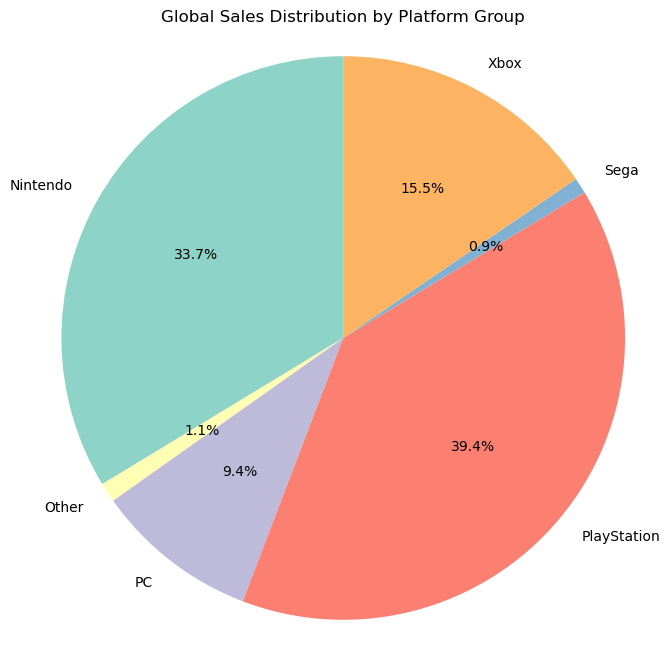

In [231]:
platform_sales_data_sorted['platform_group'] = platform_sales_data_sorted['platform'].apply(map_platform_to_group)

grouped_sales = platform_sales_data_sorted.groupby('platform_group')['global_sales'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(grouped_sales['global_sales'], labels=grouped_sales['platform_group'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(grouped_sales)))
plt.title('Global Sales Distribution by Platform Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

For platforms, PlayStation (39.4%) and Nintendo (33.7%) are the main ones globally.

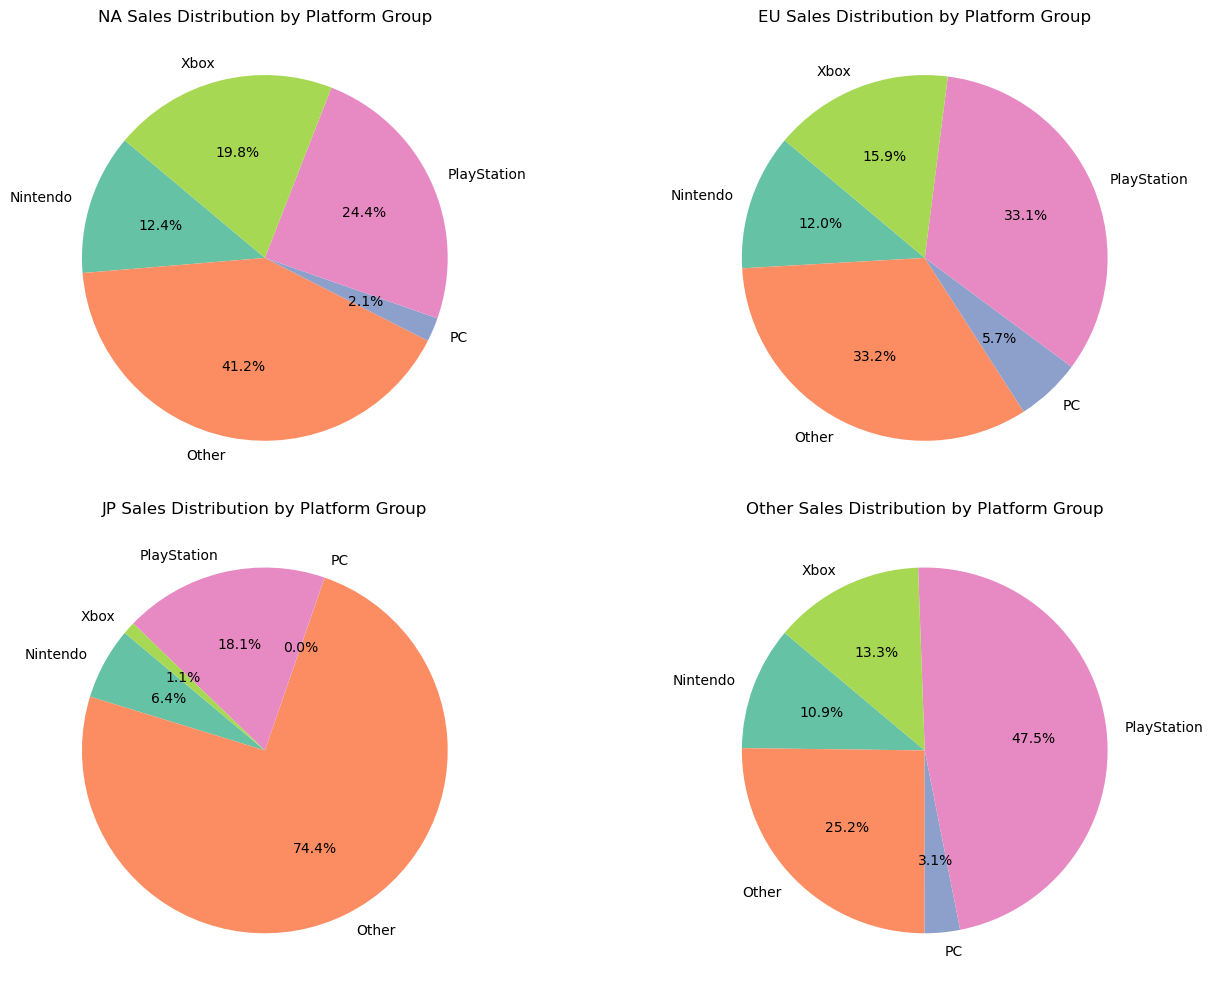

In [359]:
# Group the data by platform and sum up the regional sales
platform_sales_data_region = data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Apply the platform group mapping to the regional data
platform_sales_data_region['platform_group'] = platform_sales_data_region['platform'].apply(map_platform_to_group)

# Group the regional sales by platform group
regional_sales_grouped = platform_sales_data_region.groupby('platform_group')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Create a 2x2 grid of pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Colors
colors = sns.color_palette('Set2', len(regional_sales_grouped))

# NA Pie Chart
axes[0, 0].pie(regional_sales_grouped['na_sales'], labels=regional_sales_grouped['platform_group'], autopct='%1.1f%%', startangle=140, colors=colors)
axes[0, 0].set_title('NA Sales Distribution by Platform Group')

# EU Pie Chart
axes[0, 1].pie(regional_sales_grouped['eu_sales'], labels=regional_sales_grouped['platform_group'], autopct='%1.1f%%', startangle=140, colors=colors)
axes[0, 1].set_title('EU Sales Distribution by Platform Group')

# JP Pie Chart
axes[1, 0].pie(regional_sales_grouped['jp_sales'], labels=regional_sales_grouped['platform_group'], autopct='%1.1f%%', startangle=140, colors=colors)
axes[1, 0].set_title('JP Sales Distribution by Platform Group')

# Other Pie Chart
axes[1, 1].pie(regional_sales_grouped['other_sales'], labels=regional_sales_grouped['platform_group'], autopct='%1.1f%%', startangle=140, colors=colors)
axes[1, 1].set_title('Other Sales Distribution by Platform Group')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

Xbox has decent shares in NA (19.8%) and EU (15.9%), but barely sells in Japan (1.1%).